In [1]:
current_dir = '/content/drive/MyDrive/Apziva/Happy Customers/'

In [6]:
data_dir = current_dir + 'happy-customers.csv'

In [24]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
#visualizing data
import seaborn as sns  
import matplotlib.pyplot as plt 

#model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#feature selection
from sklearn.feature_selection import SelectFromModel


from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Model Training
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV


#Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score



In [8]:
df  = pd.read_csv(data_dir)

In [9]:
df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


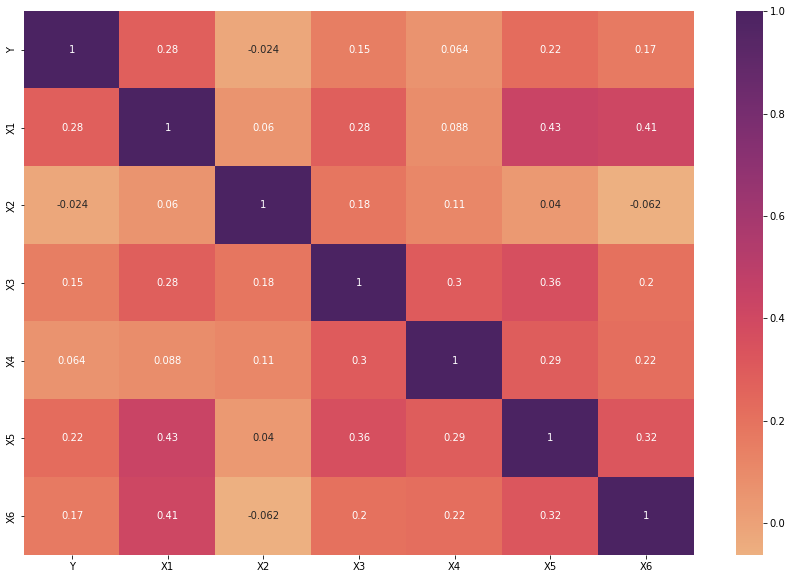

In [13]:
fig, ax = plt.subplots(figsize=(15,10))  
corr = df_customers.corr()
sns.heatmap(corr, annot=True, cmap="flare")

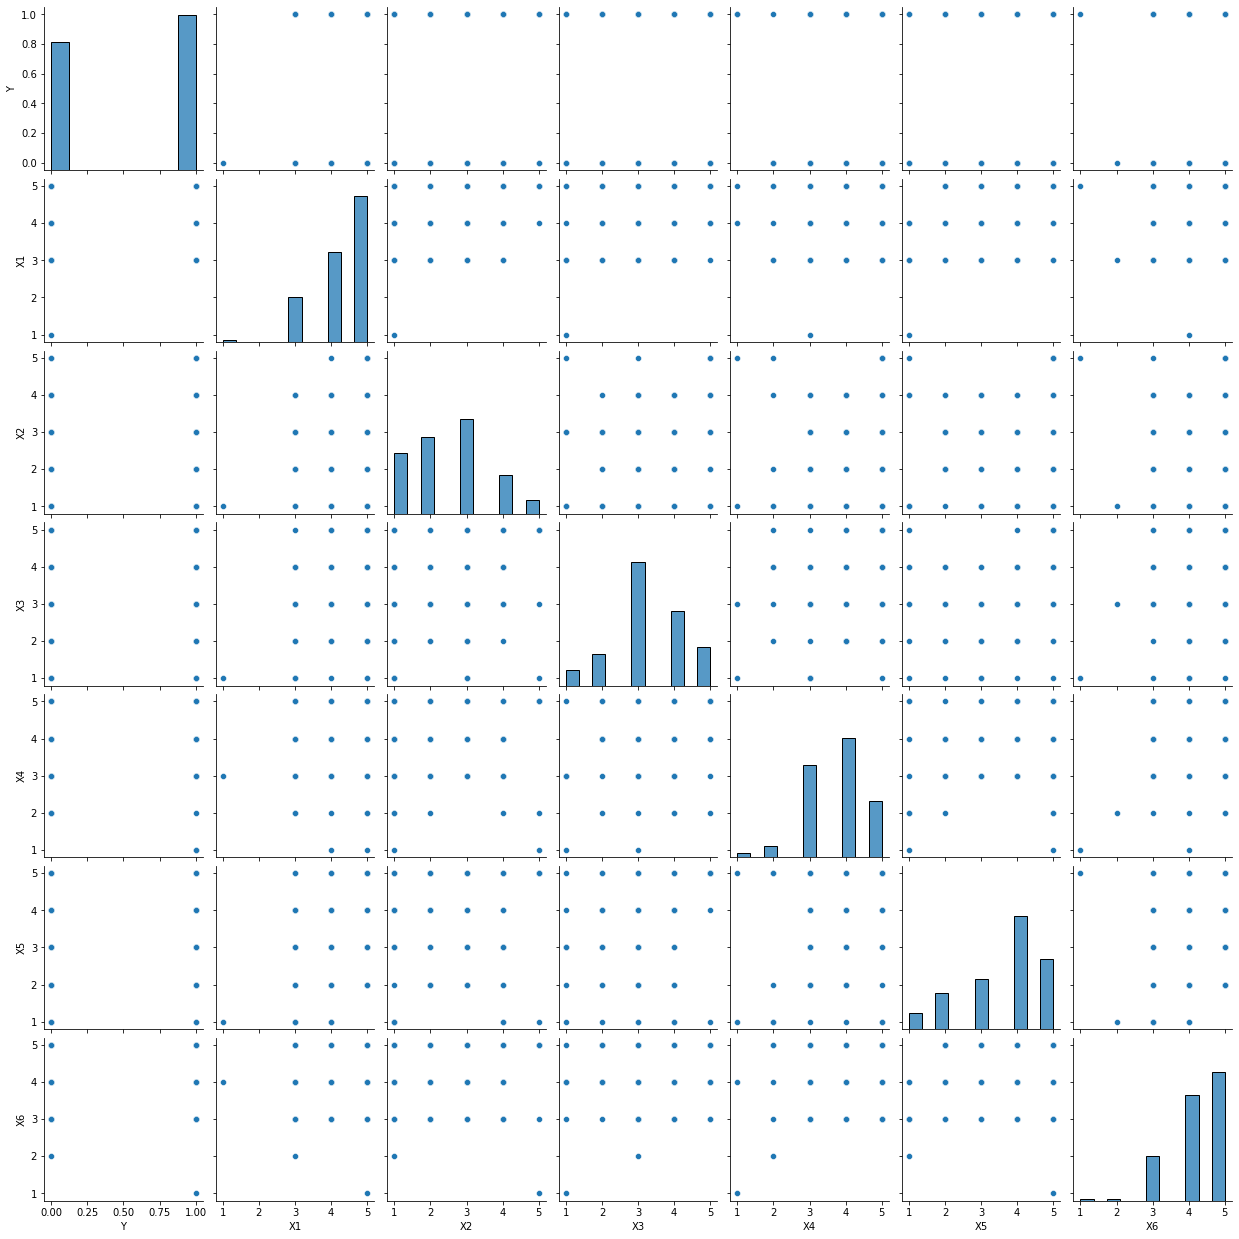

In [14]:
sns.pairplot(df)

In [21]:
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [40]:
#separate the Target and Features
target = df['Y'] 
features = df.drop(['Y'], axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state= 32) 

In [42]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [46]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=32, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(features.columns, clf.feature_importances_):
    print(feature)

('X1', 0.18661822442786088)
('X2', 0.17524367115422962)
('X3', 0.20159259693542073)
('X4', 0.11478344649458139)
('X5', 0.1852370138289574)
('X6', 0.13652504715895003)


In [48]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=32),
                threshold=0.15)

In [49]:
selected_feat= X_train.columns[(sfm.get_support())]
print(selected_feat)
len(selected_feat)

Index(['X1', 'X2', 'X3', 'X5'], dtype='object')


4

In [47]:
sel.get_support()

array([ True,  True,  True, False,  True, False])

In [28]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)
len(selected_feat)

Index(['X1', 'X2', 'X3', 'X5'], dtype='object')


4

In [76]:
new_features = df.drop(['Y'],axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(new_features, target, test_size=0.15, random_state= 32) 

In [78]:
X_train

,X1,X2,X3,X4,X5,X6
123,5,3,3,4,4,5
2,5,3,3,3,3,5
97,5,4,5,4,5,4
20,4,2,3,3,4,4
32,3,2,4,4,4,5
...,...,...,...,...,...,...
62,5,2,4,4,5,5
54,4,3,2,4,3,4
5,5,5,3,5,5,5
43,4,3,3,4,2,4


In [79]:
#Scaling the features using pipeline
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)

In [80]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear', 'poly']}
grid = GridSearchCV(svm.SVC(),param_grid,scoring='accuracy', n_jobs=-1, cv=10)

In [81]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy')

In [82]:
grid_svc_results = grid.predict(scaled_X_test)
accuracy_score(y_test,grid_svc_results)

0.3157894736842105

In [60]:
SVM_clf = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                    ('SVM', svm.SVC(kernel='poly', degree=2, gamma='scale'))])

# train the model
SVM_clf=SVM_clf.fit(X_train, y_train)

# preditc the data
y_pred_svm =SVM_clf.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred_svm), 2)))



Accuracy score to test set: 0.47



In [88]:
from sklearn.compose import ColumnTransformer
# this is the only class that we will need for all the encoding that we will do for numerical columns
from sklearn.preprocessing import KBinsDiscretizer

In [90]:
NumEncod = ColumnTransformer(transformers = [
        ("equalwidth", KBinsDiscretizer(strategy = 'uniform', n_bins=3, encode = "ordinal"), [0])
    ])

Text(0.5, 1.0, 'Before Binnning')

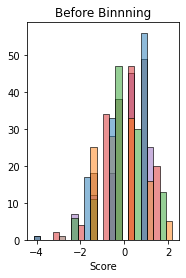

In [95]:
plt.subplot(1,2,1)
sns.histplot(data = scaled_X_train, color="#D6265D", legend=False)
plt.xlabel("Score")
plt.ylabel("")
plt.title("Before Binnning")

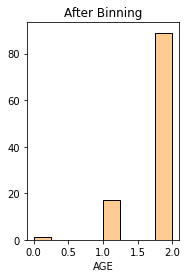

In [96]:
plt.subplot(1,2,2)
sns.histplot(data = NumEncod.fit_transform(scaled_X_train), palette="YlOrBr", legend=False)
plt.xlabel("AGE")
plt.ylabel("")
plt.title("After Binning")
plt.show()

In [97]:
X_train_bin = NumEncod.fit_transform(scaled_X_train)

In [101]:
X_test_bin = NumEncod.fit_transform(scaled_X_test)

In [98]:
grid.fit(X_train_bin,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy')

In [102]:
grid_svc_results = grid.predict(X_test_bin)
accuracy_score(y_test,grid_svc_results)

0.47368421052631576